### PCA Analysis

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact, widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go
import folium

In [531]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and preprocess data
data = pd.read_csv("data/final_data.csv")
data = data[~data['country'].isin(['Singapore', 'Hong Kong S.A.R. of China', 'Lesotho'])]
data = data.loc[:, 'year':'continent'] # Drop previous calculated PCA columns

# Splitting data into index, numeric, and categorical 
index_data = data.loc[:, ['country', 'year']]
numeric_data = data.loc[:, 'life_ladder':'suicide_rate']
categorical_data = data.loc[:, ['region', 'continent']]

# Scaling numeric data
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)

# One-hot encoding categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(categorical_data), 
                                        columns=encoder.get_feature_names_out(categorical_data.columns))

# Merging scaled and encoded data
pca_data = pd.concat([index_data.reset_index(drop=True), 
                      scaled_numeric_data.reset_index(drop=True), 
                      encoded_categorical_data.reset_index(drop=True)], axis=1)


c:\Users\thali\anaconda3\envs\py310_remote_sensing\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [533]:
pca_data

,country,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,...,region_Southern Asia,region_Southern Europe,region_Western Africa,region_Western Asia,region_Western Europe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,Afghanistan,2008.0,-1.549841,-1.727831,-3.017410,-1.684946,-0.183955,1.041112,0.748841,-1.801208,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,2009.0,-0.947337,-1.579800,-2.174567,-1.631292,-0.460873,1.177576,0.569485,-1.185111,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Afghanistan,2010.0,-0.630978,-1.486628,-2.283052,-1.577639,-1.021809,0.749577,-0.232013,-0.867727,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Afghanistan,2011.0,-1.453867,-1.510138,-2.433262,-1.534716,-1.760256,1.003895,-0.097496,-0.933071,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Afghanistan,2012.0,-1.497411,-1.436123,-2.433262,-1.491793,-1.511740,1.462909,0.154724,-0.008925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,Zimbabwe,2016.0,-1.540066,-1.193177,-0.372051,-1.202065,-0.077448,-0.590246,-0.136730,0.252450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1878,Zimbabwe,2017.0,-1.626265,-1.165313,-0.488881,-1.121585,0.064561,-0.608854,0.014602,0.887217,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1879,Zimbabwe,2018.0,-1.645816,-1.136577,-0.313637,-1.041105,0.135565,-0.422768,0.535856,-0.008925,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1880,Zimbabwe,2019.0,-2.465151,-1.222784,-0.447156,-0.960624,-0.794594,-0.397956,0.462992,0.047084,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 1: Standard PCA

In [534]:
from sklearn.decomposition import PCA, KernelPCA

# Performing PCA
pca = PCA(n_components=3)
# pca_transformed_data = pca.fit_transform(pca_data.loc[:,'life_ladder':])
pca_transformed_data = pca.fit_transform(pca_data.loc[:,'life_ladder':'suicide_rate']) # Uncomment, if you want to use numerical values only
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio by Standard PCA Components:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.2f}")

Explained Variance Ratio by Standard PCA Components:
PC1: 0.39
PC2: 0.16
PC3: 0.11


In [535]:
#Since so many of the values are negative, we will multiply the values with -1
#This makes the graphs easier to interpret later on

loadings = pca.components_ * (-1)

principal_data = pd.DataFrame(data=pca_transformed_data * (-1), columns=['PC1', 'PC2', 'PC3'])

In [508]:
squared_loadings = pd.DataFrame(np.square(loadings).T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)], index=pca_data.loc[:,'life_ladder':'suicide_rate'].columns)

#Calculating the proportion of the variance explained by each variable for each PC
for pc in squared_loadings.columns:
    squared_loadings[pc] /= squared_loadings[pc].sum()

#Converting proportions to percentages
squared_loadings_percentage = squared_loadings * 100

#Displaying top 5 loadings as percentages for each PC
for i in range(pca.n_components_):
    print(f"Top 5 loadings as percentages for PC{i+1}:")
    print()
    top_loadings = squared_loadings_percentage.iloc[:, i].sort_values(ascending=False).head(5)
    print(top_loadings)
    print("\n")

Top 5 loadings as percentages for PC1:

life_ladder                     19.294822
log_gdp_per_capita              15.621955
social_suppoprt                 15.458190
healthy_life_exp_at_birth       14.335179
freedom_to_make_life_choices    11.081858
Name: PC1, dtype: float64


Top 5 loadings as percentages for PC2:

generosity                      31.599856
suicide_rate                    16.513231
positive_affect                 13.014551
freedom_to_make_life_choices    11.589334
log_gdp_per_capita               9.950294
Name: PC2, dtype: float64


Top 5 loadings as percentages for PC3:

negative_affect              61.758738
suicide_rate                 15.239343
healthy_life_exp_at_birth    11.221191
log_gdp_per_capita            5.096393
positive_affect               2.221586
Name: PC3, dtype: float64




In [536]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# Ensure pca_transformed_data is a DataFrame
if not isinstance(pca_transformed_data, pd.DataFrame):
    pca_transformed_data = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# # Apply DBSCAN clustering
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan_clusters = dbscan.fit_predict(pca_transformed_data)

# # Add the cluster labels to your data
# pca_transformed_data['dbscan_cluster'] = dbscan_clusters

# # Check the number of clusters formed and noise points
# n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
# n_noise_ = list(dbscan_clusters).count(-1)

# print(f'Estimated number of clusters: {n_clusters_}')
# print(f'Estimated number of noise points: {n_noise_}')
# pca_transformed_data

pca_transformed_data

,PC1,PC2,PC3
0,3.960390,-1.510935,-0.561386
1,3.076343,-1.502884,-0.805473
2,2.946553,-1.403524,-0.489247
3,3.607106,-1.321808,-0.537448
4,3.223254,-1.860071,-0.745188
...,...,...,...
1877,1.463699,0.054589,-1.786091
1878,1.372613,-0.276202,-1.749274
1879,1.633391,0.028513,-1.567703
1880,2.368541,0.205334,-1.430966


c:\Users\thali\anaconda3\envs\py310_remote_sensing\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



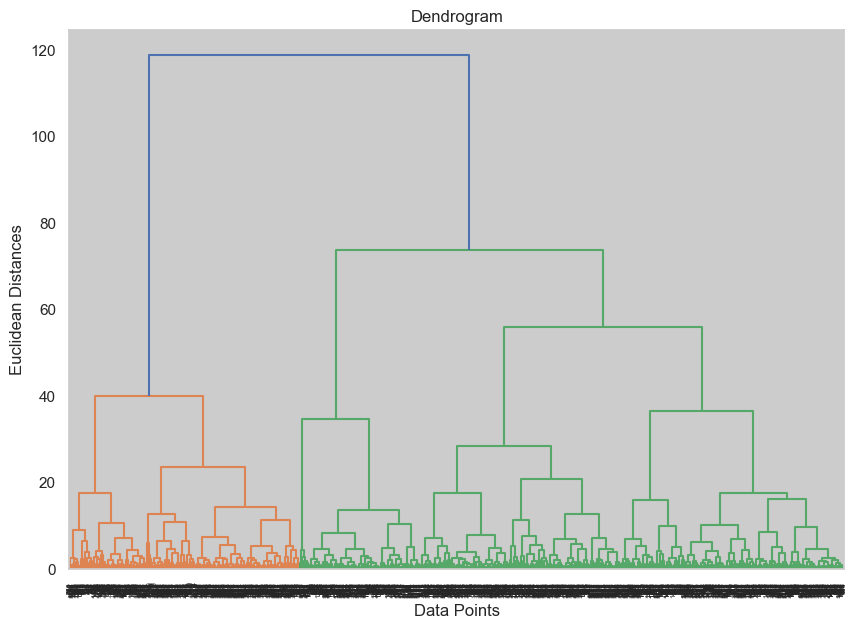

In [537]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Ensure pca_transformed_data is a DataFrame
if not isinstance(pca_transformed_data, pd.DataFrame):
    pca_transformed_data = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# Number of clusters
n_clusters = 5

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(pca_transformed_data)

# Add the cluster labels to your data
pca_transformed_data['hierarchical_cluster'] = hierarchical_clusters

# Plotting the dendrogram (optional)
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_transformed_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()


In [538]:
pca_transformed_data

,PC1,PC2,PC3,hierarchical_cluster
0,3.960390,-1.510935,-0.561386,3
1,3.076343,-1.502884,-0.805473,3
2,2.946553,-1.403524,-0.489247,3
3,3.607106,-1.321808,-0.537448,3
4,3.223254,-1.860071,-0.745188,3
...,...,...,...,...
1877,1.463699,0.054589,-1.786091,3
1878,1.372613,-0.276202,-1.749274,3
1879,1.633391,0.028513,-1.567703,3
1880,2.368541,0.205334,-1.430966,3


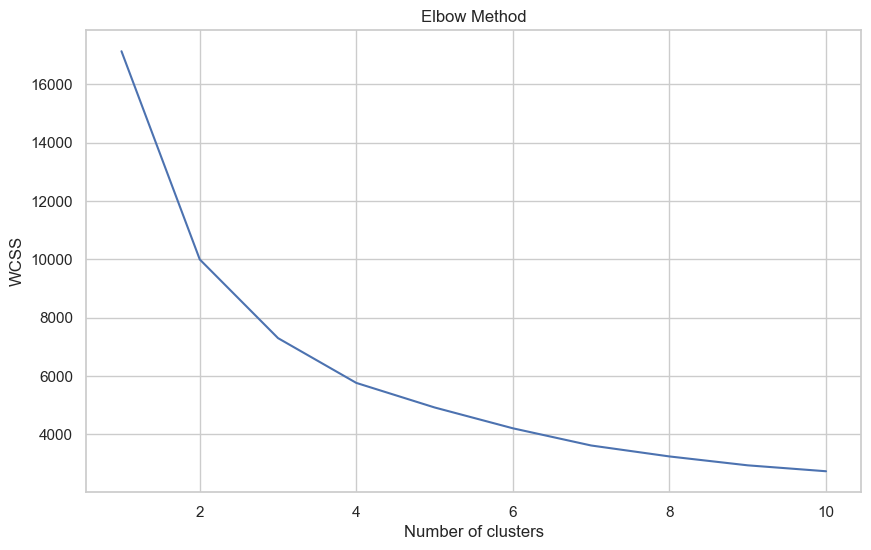

In [539]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_transformed_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [550]:
# Apply clustering (use the optimal number of clusters found from the Elbow Method)
optimal_clusters = 5  # Replace with the number found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans_clusters = kmeans.fit_predict(pca_transformed_data.loc[:,'PC1':'PC3'])

# Add the cluster labels to your data
pca_transformed_data['kmeans_cluster'] = kmeans_clusters
# Print WCSS
wcss = kmeans.inertia_
print(f"WCSS for the current clustering solution: {wcss}")


# Reset the index of your original data if necessary
data.reset_index(drop=True, inplace=True)

# Concatenate the original data, Kernel PCA data, and cluster labels
pca_clustered_data = pd.concat([data.loc[:,'year':'country'], pca_transformed_data], axis=1)
pca_clustered_data

c:\Users\thali\anaconda3\envs\py310_remote_sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for the current clustering solution: 4489.902952914713


,year,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate,country,PC1,PC2,PC3,hierarchical_cluster,kmeans_cluster
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,40.518221,4.600,Afghanistan,3.960390,-1.510935,-0.561386,3,4
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,41.987193,4.400,Afghanistan,3.076343,-1.502884,-0.805473,3,4
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,43.220447,4.300,Afghanistan,2.946553,-1.403524,-0.489247,3,4
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,44.844851,4.100,Afghanistan,3.607106,-1.321808,-0.537448,3,4
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,46.711251,4.000,Afghanistan,3.223254,-1.860071,-0.745188,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,2016.0,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,37.359969,16.800,Zimbabwe,1.463699,0.054589,-1.786091,3,4
1878,2017.0,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,38.131320,15.000,Zimbabwe,1.372613,-0.276202,-1.749274,3,4
1879,2018.0,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,38.909614,14.000,Zimbabwe,1.633391,0.028513,-1.567703,3,4
1880,2019.0,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,39.691374,14.100,Zimbabwe,2.368541,0.205334,-1.430966,3,4


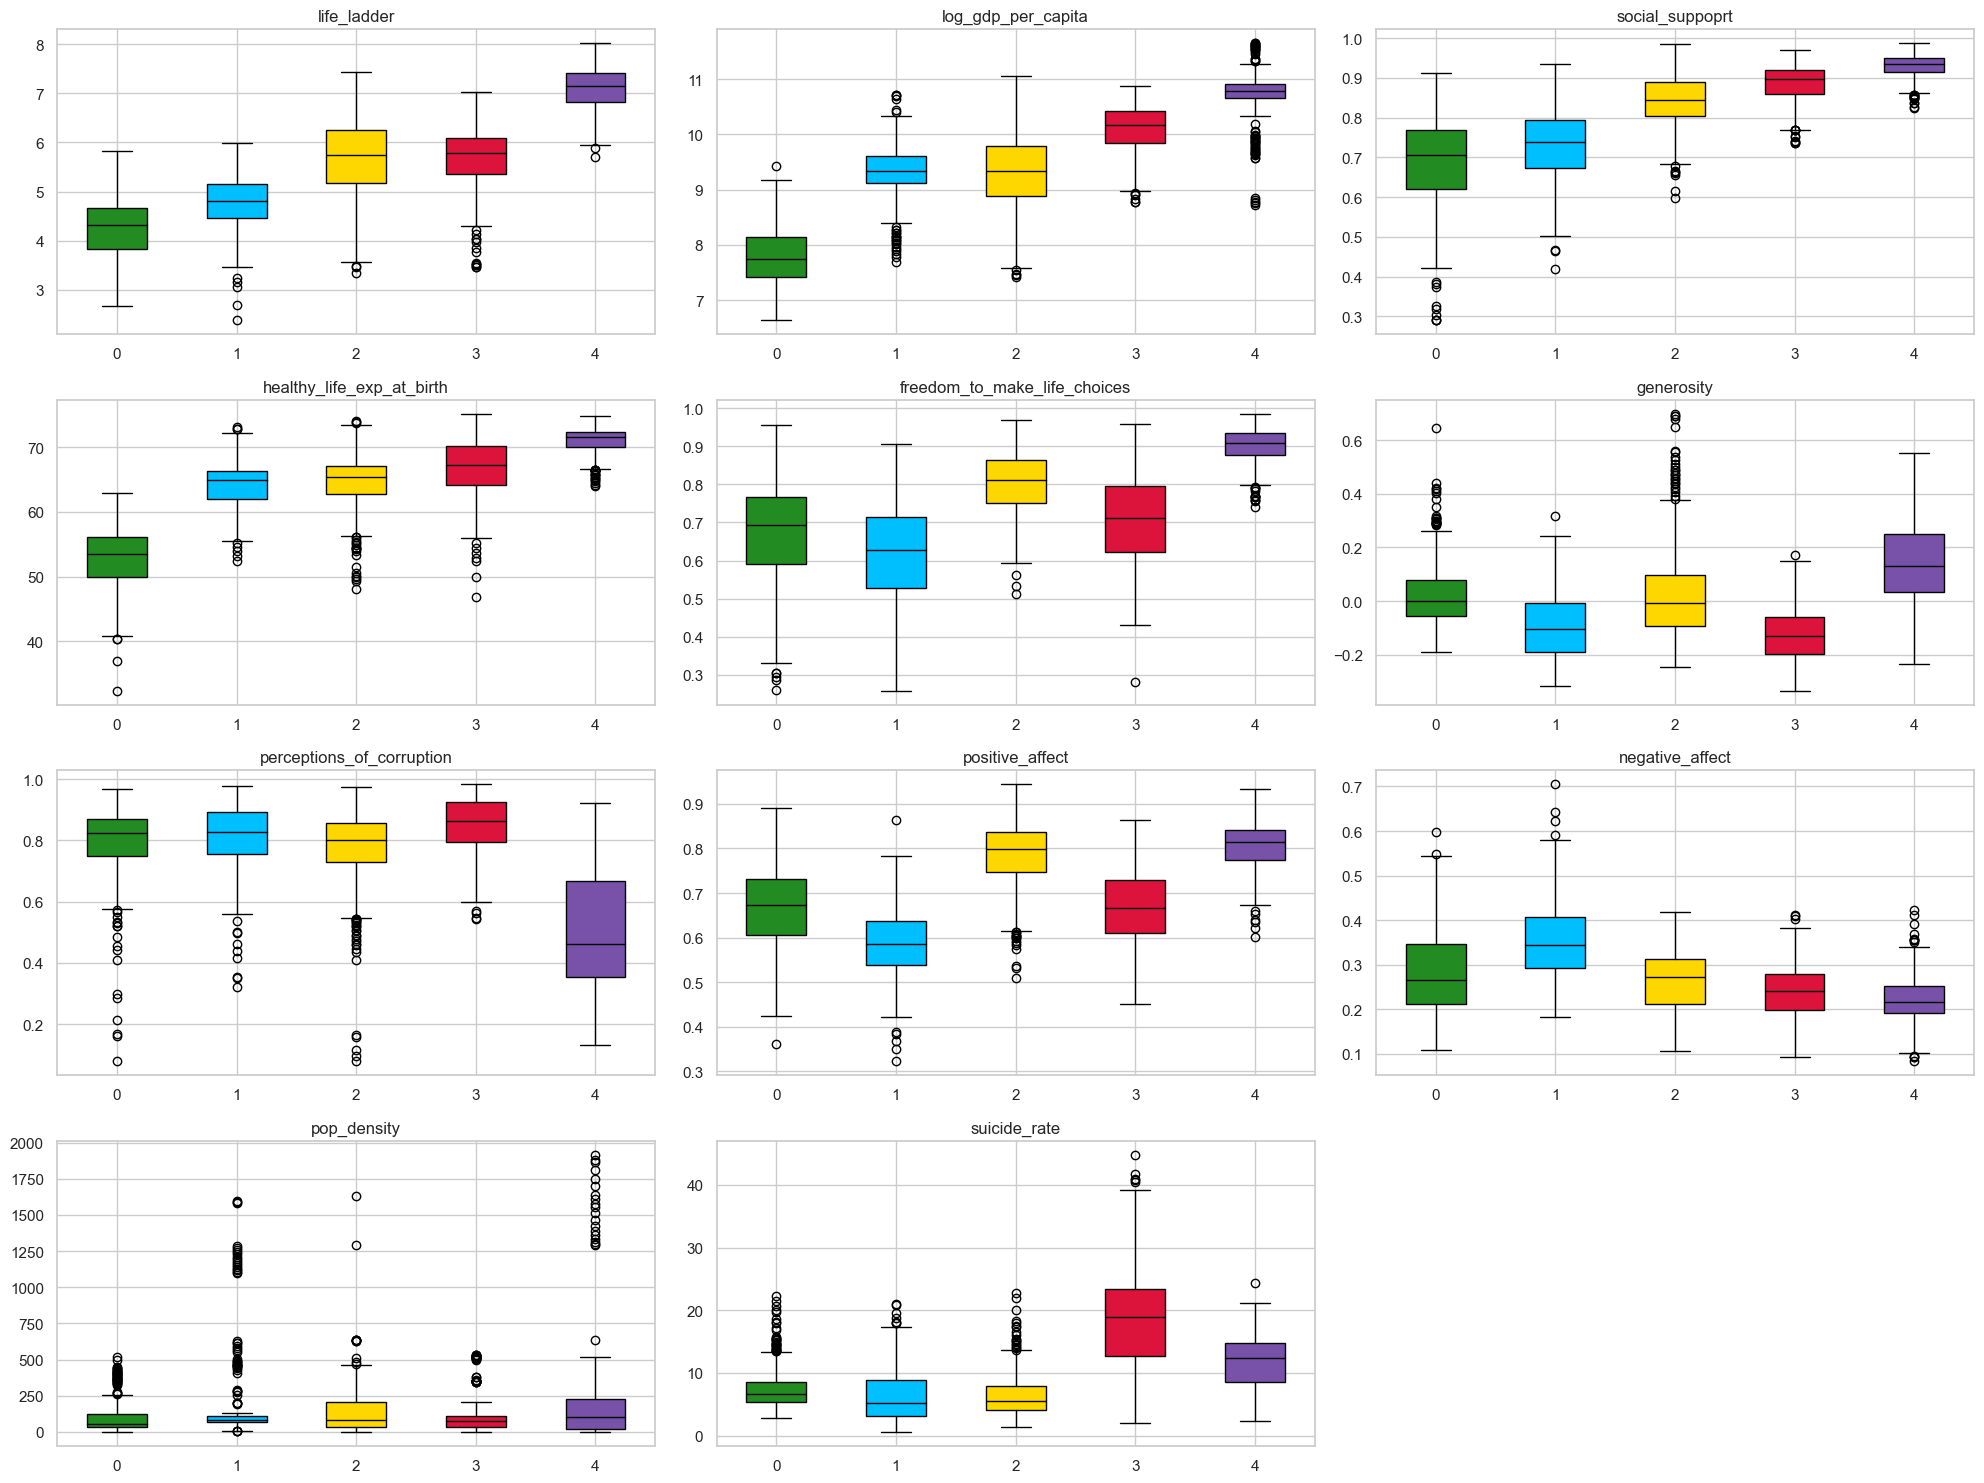

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median 'life_ladder' for each cluster and sort
median_life_ladder_per_cluster = pca_clustered_data.groupby('kmeans_cluster')['life_ladder'].median().sort_values(ascending=True)

# Create a mapping from old to new cluster labels
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(median_life_ladder_per_cluster.index)}

# Apply this mapping to the 'cluster' column
pca_clustered_data['kmeans_cluster'] = pca_clustered_data['kmeans_cluster'].map(cluster_mapping)

# Update the color map based on new cluster labels
color_map = {str(new_label): color for new_label, (old_label, color) in enumerate(color_map.items())}

# List of numerical columns from 'life_ladder' to 'suicide_rate'
numerical_columns = pca_clustered_data.loc[:, 'life_ladder':'suicide_rate'].columns

# Iterate through each numerical column to create a boxplot
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)

    # Create a list of data for each cluster for the current column
    data_to_plot = [pca_clustered_data[pca_clustered_data['kmeans_cluster'] == new_label][column] 
                    for new_label in sorted(pca_clustered_data['kmeans_cluster'].unique())]

    bp = plt.boxplot(data_to_plot, patch_artist=True)

    # Set the colors for each boxplot
    for patch, color in zip(bp['boxes'], color_map.values()):
        patch.set_facecolor(color)

    # Change the color of the median line
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(1)

    plt.title(column)
    plt.xticks(ticks=range(1, len(color_map) + 1), labels=[str(x) for x in sorted(color_map.keys())])
    plt.xlim(0.5, len(color_map) + 0.5)

plt.tight_layout()
plt.show()


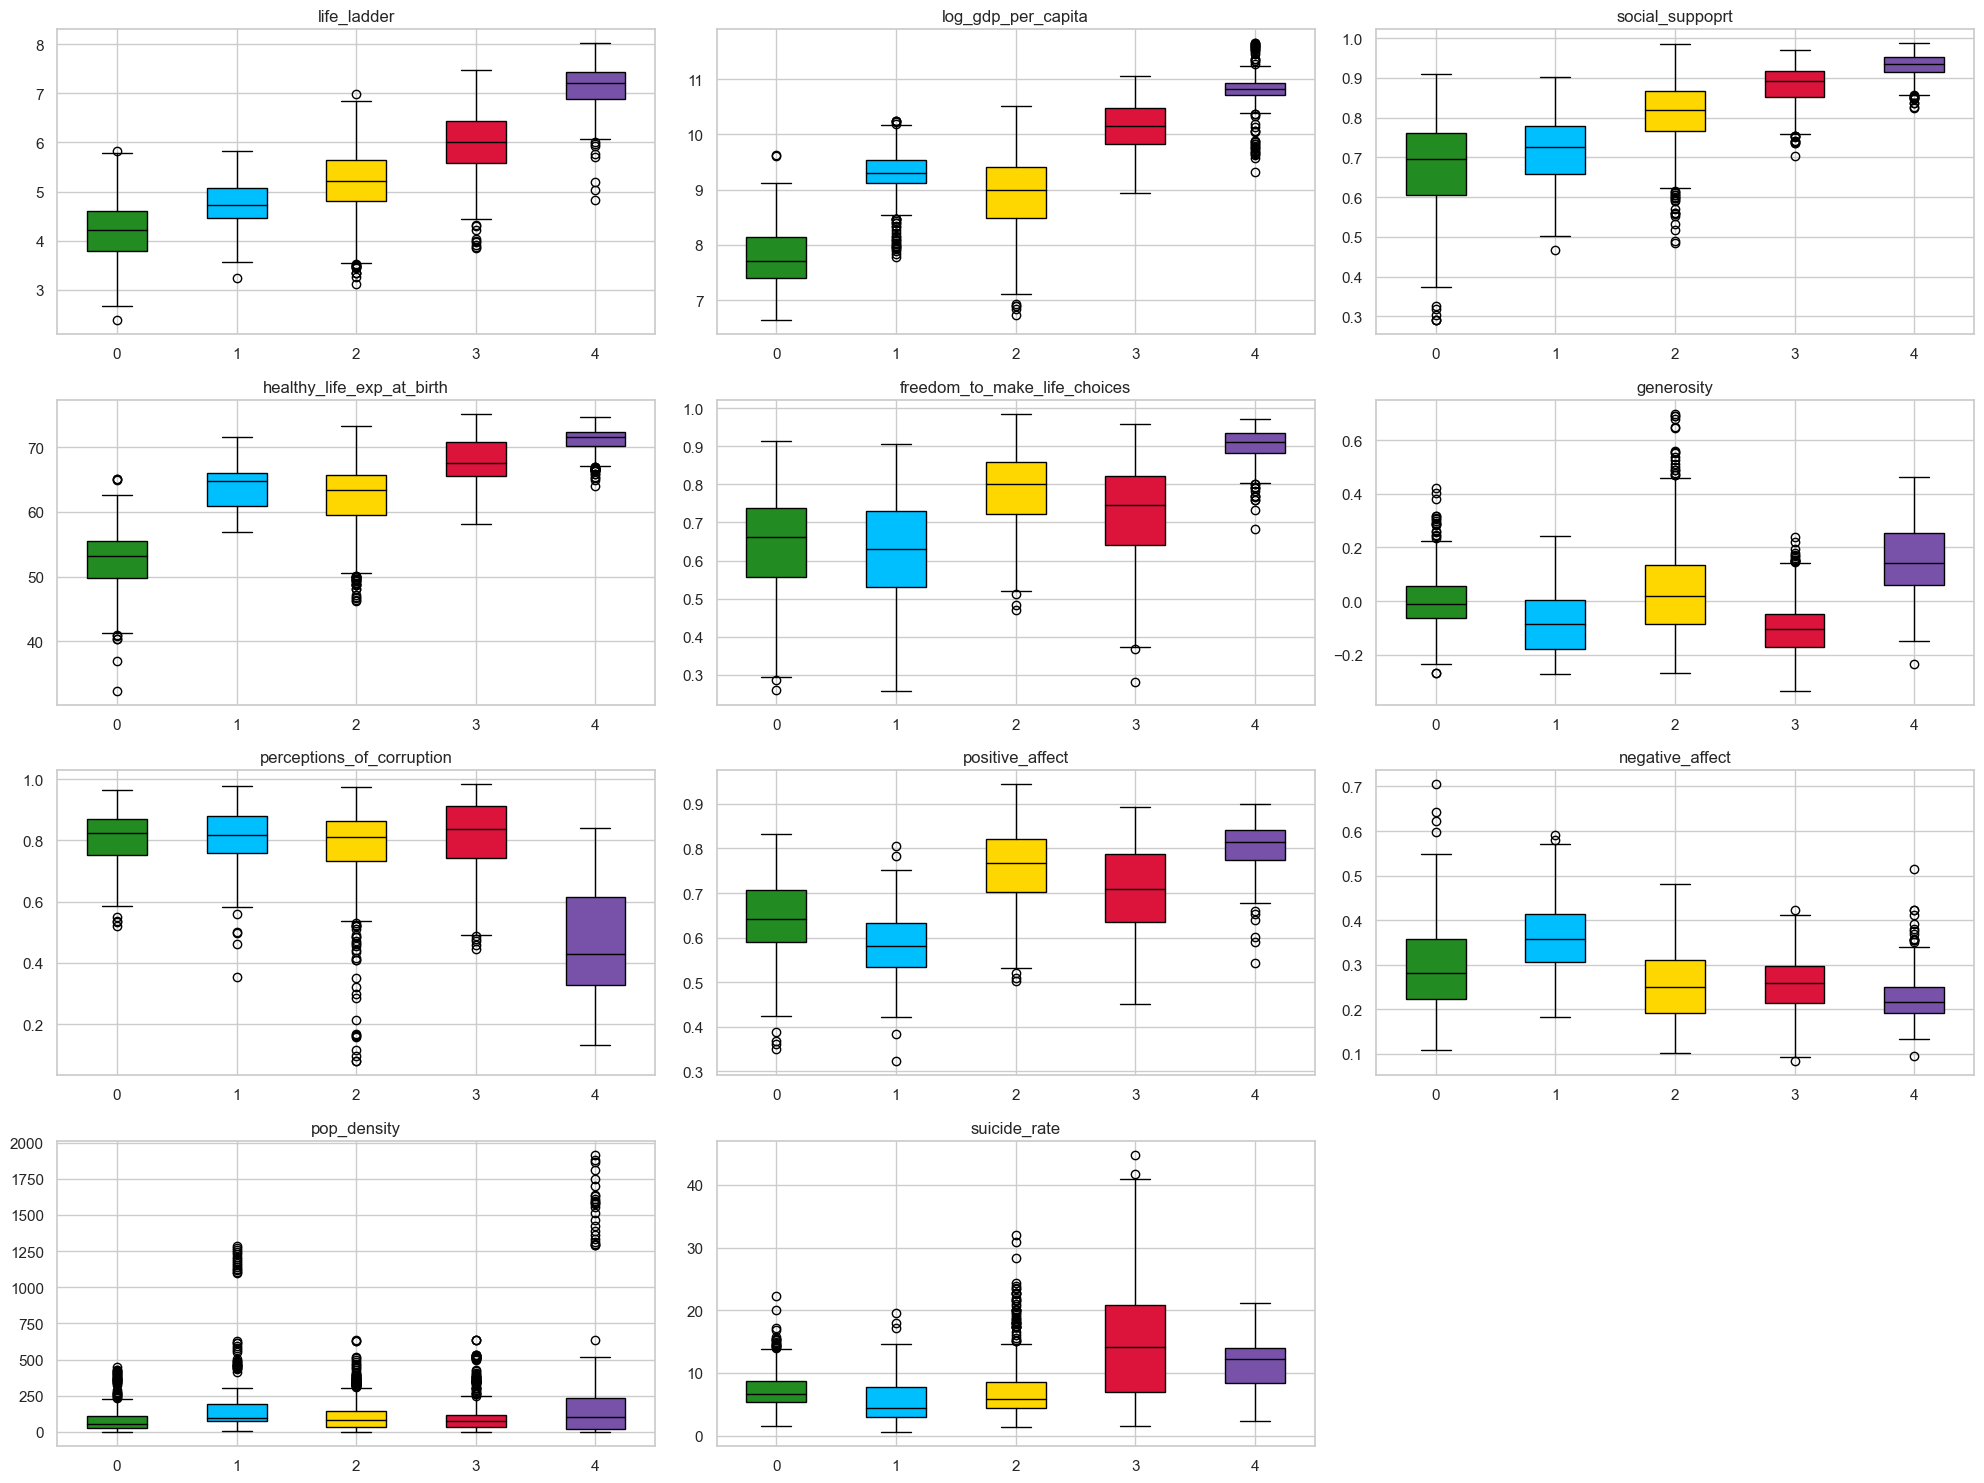

In [552]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median 'life_ladder' for each cluster and sort
median_life_ladder_per_cluster = pca_clustered_data.groupby('hierarchical_cluster')['life_ladder'].median().sort_values(ascending=True)

# Create a mapping from old to new cluster labels
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(median_life_ladder_per_cluster.index)}

# Apply this mapping to the 'cluster' column
pca_clustered_data['hierarchical_cluster'] = pca_clustered_data['hierarchical_cluster'].map(cluster_mapping)

# Update the color map based on new cluster labels
color_map = {str(new_label): color for new_label, (old_label, color) in enumerate(color_map.items())}

# List of numerical columns from 'life_ladder' to 'suicide_rate'
numerical_columns = pca_clustered_data.loc[:, 'life_ladder':'suicide_rate'].columns

# Iterate through each numerical column to create a boxplot
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)

    # Create a list of data for each cluster for the current column
    data_to_plot = [pca_clustered_data[pca_clustered_data['hierarchical_cluster'] == new_label][column] 
                    for new_label in sorted(pca_clustered_data['hierarchical_cluster'].unique())]

    bp = plt.boxplot(data_to_plot, patch_artist=True)

    # Set the colors for each boxplot
    for patch, color in zip(bp['boxes'], color_map.values()):
        patch.set_facecolor(color)

    # Change the color of the median line
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(1)

    plt.title(column)
    plt.xticks(ticks=range(1, len(color_map) + 1), labels=[str(x) for x in sorted(color_map.keys())])
    plt.xlim(0.5, len(color_map) + 0.5)

plt.tight_layout()
plt.show()


In [556]:
import plotly.express as px

# 3D scatter plot for visualizing clusters
fig = px.scatter_3d(pca_clustered_data, x='PC1', y='PC2', z='PC3', color='hierarchical_cluster', 
                    title='3D PCA Visualization Colored by Cluster')
fig.show()


#### 2: Kernelized PCA

In [408]:
# Performing Kernel PCA
kernel_pca = KernelPCA(n_components=3, kernel='rbf')
# kernel_pca_transformed_data = kernel_pca.fit_transform(pca_data.loc[:,'life_ladder':])
kernel_pca_transformed_data = kernel_pca.fit_transform(pca_data.loc[:,'life_ladder':'suicide_rate']) # Uncomment, if you want to use numerical values only


In [409]:
pca_data.loc[:,'life_ladder':'suicide_rate']

,life_ladder,log_gdp_per_capita,social_suppoprt,healthy_life_exp_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,pop_density,suicide_rate
0,-1.556735,-1.728233,-3.039480,-1.680149,-0.192824,1.031978,0.747713,-1.805665,-0.125123,-0.232973,-0.734748
1,-0.952888,-1.581590,-2.191774,-1.627075,-0.470348,1.168341,0.577036,-1.187981,-0.374908,-0.231167,-0.761142
2,-0.635825,-1.489292,-2.300885,-1.574000,-1.032511,0.740657,-0.185680,-0.869781,0.077085,-0.229652,-0.774339
3,-1.460547,-1.512582,-2.451961,-1.531540,-1.772573,0.994788,-0.057672,-0.935293,-0.018072,-0.227655,-0.800733
4,-1.504188,-1.439261,-2.451961,-1.489081,-1.523513,1.453464,0.182344,-0.008767,-0.006177,-0.225362,-0.813930
...,...,...,...,...,...,...,...,...,...,...,...
1905,-1.546938,-1.198596,-0.378859,-1.202477,-0.086085,-0.598181,-0.095007,0.253280,-0.707956,-0.236854,0.875280
1906,-1.633329,-1.170993,-0.496363,-1.122865,0.056235,-0.616776,0.049002,0.889681,-0.529538,-0.235906,0.637734
1907,-1.652923,-1.142527,-0.320107,-1.043253,0.127395,-0.430826,0.545034,-0.008767,-0.672272,-0.234950,0.505765
1908,-2.474082,-1.227924,-0.454397,-0.963641,-0.804799,-0.406033,0.475696,0.047386,-0.398697,-0.233989,0.518962


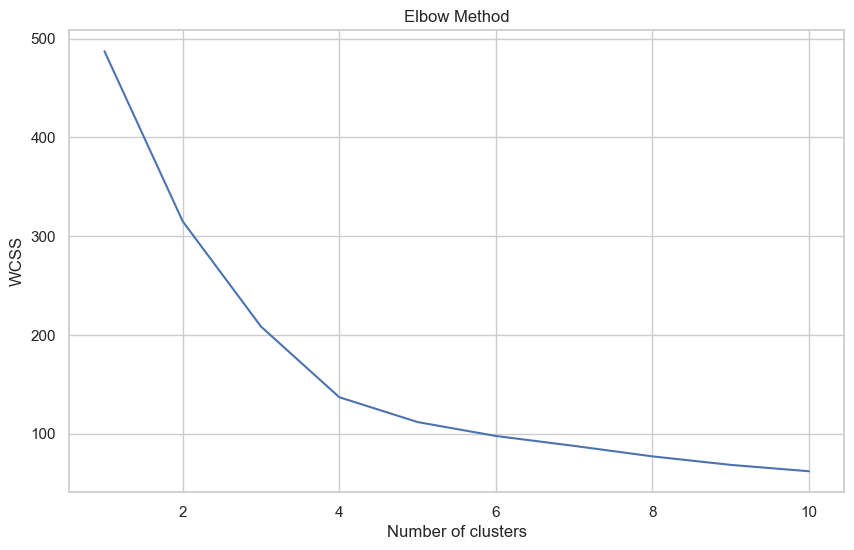

In [410]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(kernel_pca_transformed_data)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [411]:
# Apply clustering (use the optimal number of clusters found from the Elbow Method)
optimal_clusters = 5  # Replace with the number found from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(kernel_pca_transformed_data)

# Print WCSS
wcss = kmeans.inertia_
print(f"WCSS for the current clustering solution: {wcss}")

# Create a DataFrame from the Kernel PCA-transformed data
kernel_pca_df = pd.DataFrame(kernel_pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# Reset the index of your original data if necessary
data.reset_index(drop=True, inplace=True)

# Concatenate the original data, Kernel PCA data, and cluster labels
kernel_pca_clustered_data = pd.concat([data, kernel_pca_df], axis=1)
kernel_pca_clustered_data['cluster'] = clusters


c:\Users\thali\anaconda3\envs\py310_remote_sensing\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for the current clustering solution: 111.86735610212885


In [412]:
import numpy as np
kernel_pca_clustered_data.loc[:,'life_ladder':'suicide_rate']
kernel_pca_clustered_data.columns
np.unique(kernel_pca_clustered_data['continent'])

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

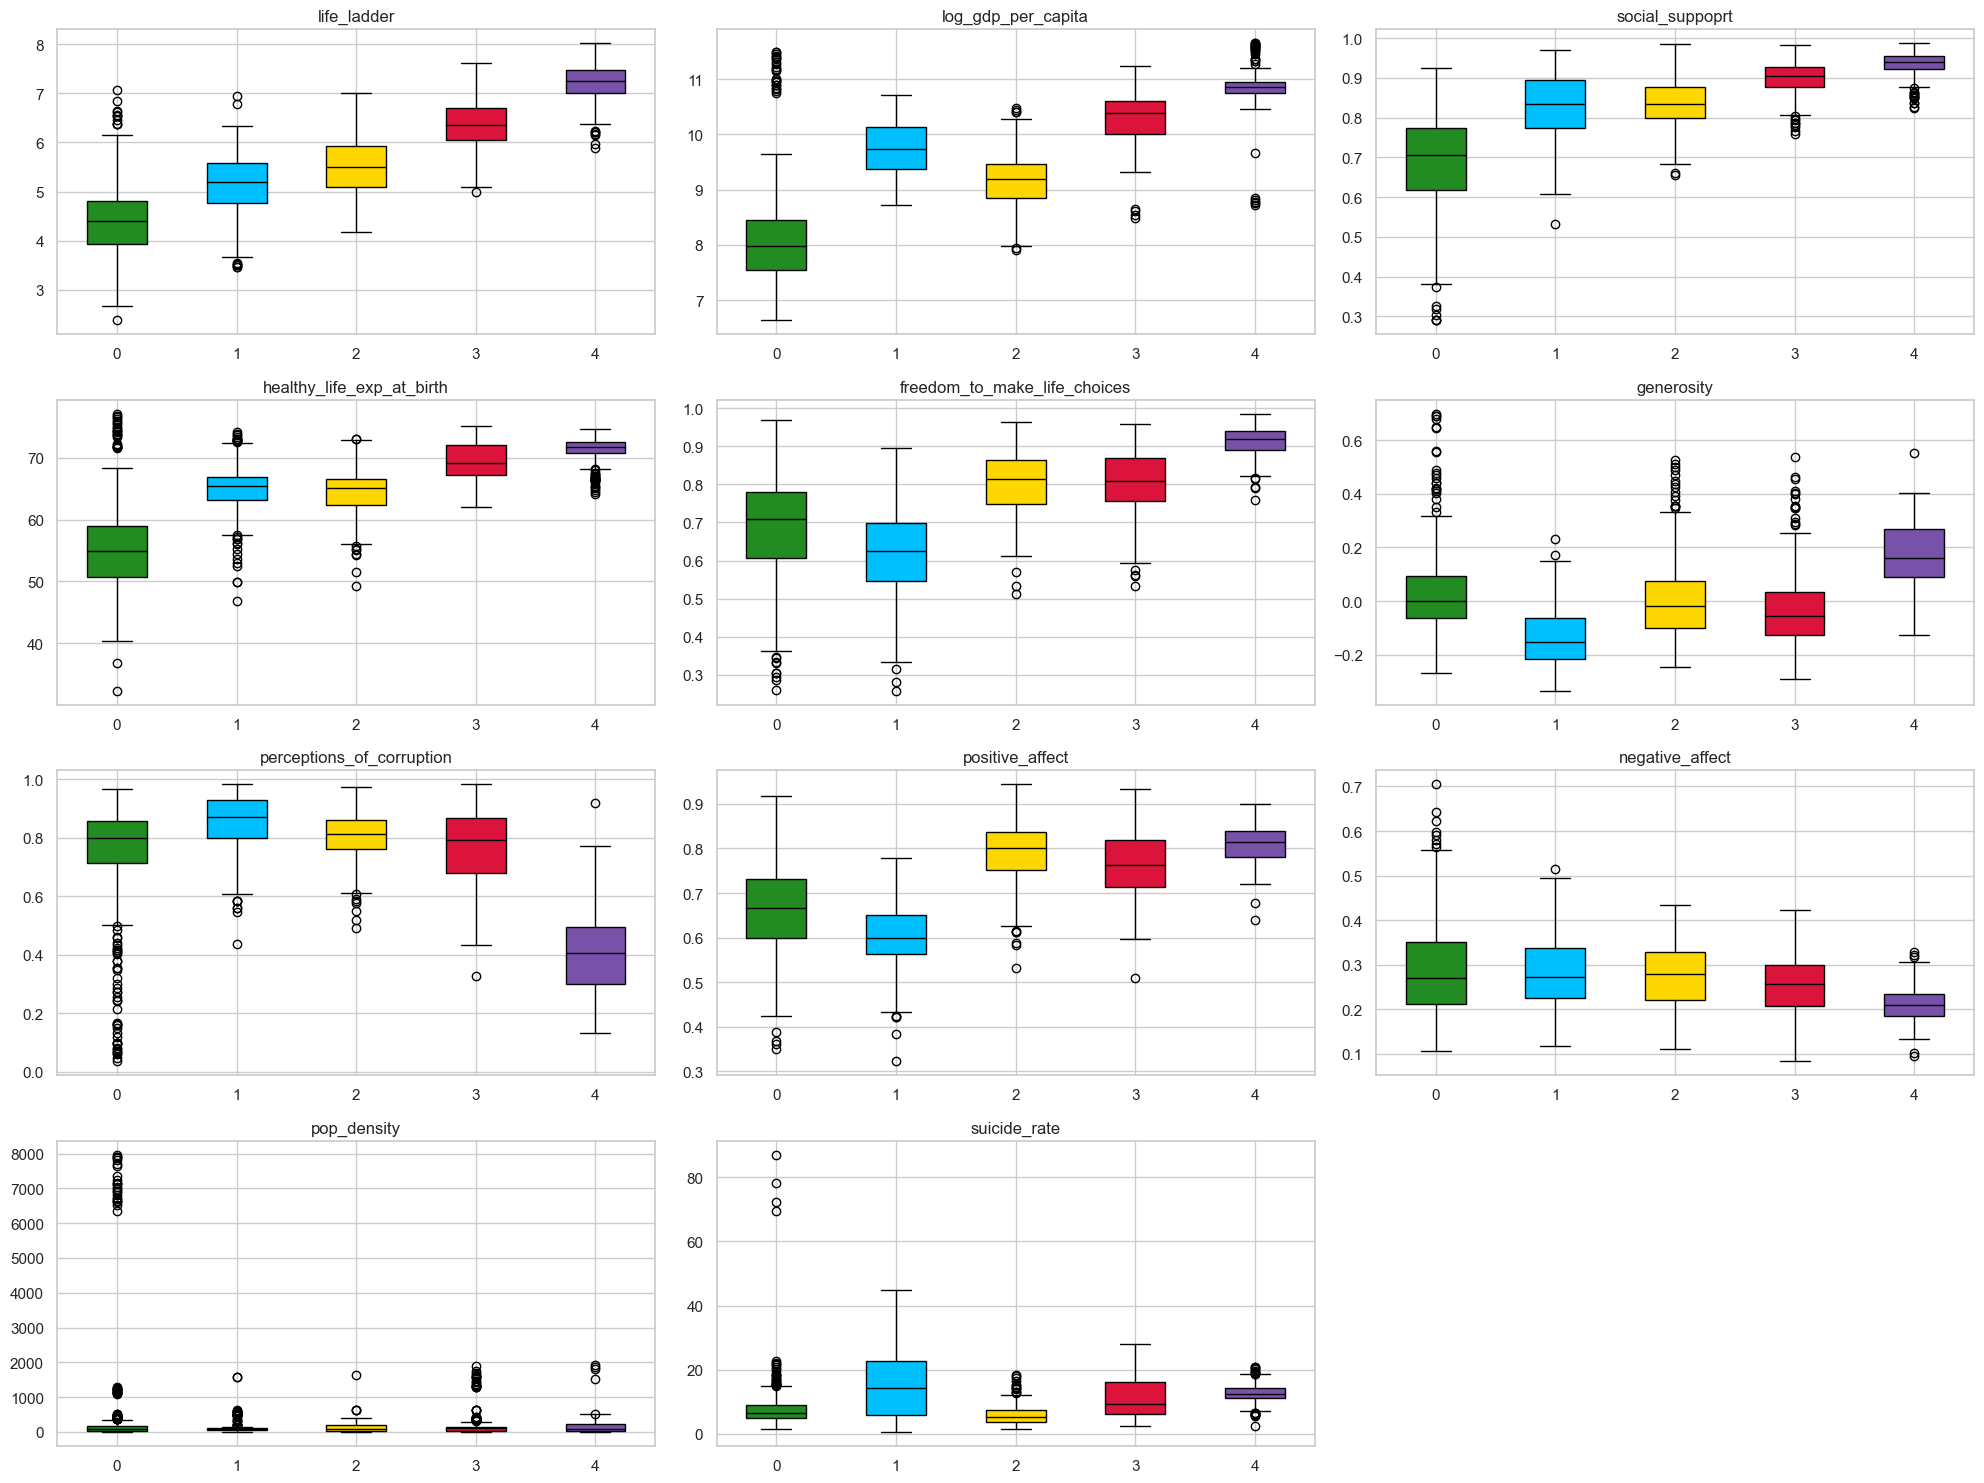

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median 'life_ladder' for each cluster and sort
median_life_ladder_per_cluster = kernel_pca_clustered_data.groupby('cluster')['life_ladder'].median().sort_values(ascending=True)

# Create a mapping from old to new cluster labels
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(median_life_ladder_per_cluster.index)}

# Apply this mapping to the 'cluster' column
kernel_pca_clustered_data['cluster'] = kernel_pca_clustered_data['cluster'].map(cluster_mapping)

# Update the color map based on new cluster labels
color_map = {str(new_label): color for new_label, (old_label, color) in enumerate(color_map.items())}

# List of numerical columns from 'life_ladder' to 'suicide_rate'
numerical_columns = kernel_pca_clustered_data.loc[:, 'life_ladder':'suicide_rate'].columns

# Iterate through each numerical column to create a boxplot
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)

    # Create a list of data for each cluster for the current column
    data_to_plot = [kernel_pca_clustered_data[kernel_pca_clustered_data['cluster'] == new_label][column] 
                    for new_label in sorted(kernel_pca_clustered_data['cluster'].unique())]

    bp = plt.boxplot(data_to_plot, patch_artist=True)

    # Set the colors for each boxplot
    for patch, color in zip(bp['boxes'], color_map.values()):
        patch.set_facecolor(color)

    # Change the color of the median line
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(1)

    plt.title(column)
    plt.xticks(ticks=range(1, len(color_map) + 1), labels=[str(x) for x in sorted(color_map.keys())])
    plt.xlim(0.5, len(color_map) + 0.5)

plt.tight_layout()
plt.show()


In [414]:
import plotly.express as px

# 3D scatter plot for visualizing clusters
fig = px.scatter_3d(kernel_pca_clustered_data, x='PC1', y='PC2', z='PC3', color='cluster', 
                    title='3D PCA Visualization Colored by Cluster')
fig.show()


Check correlations between pcas of normal and kernelized PCA

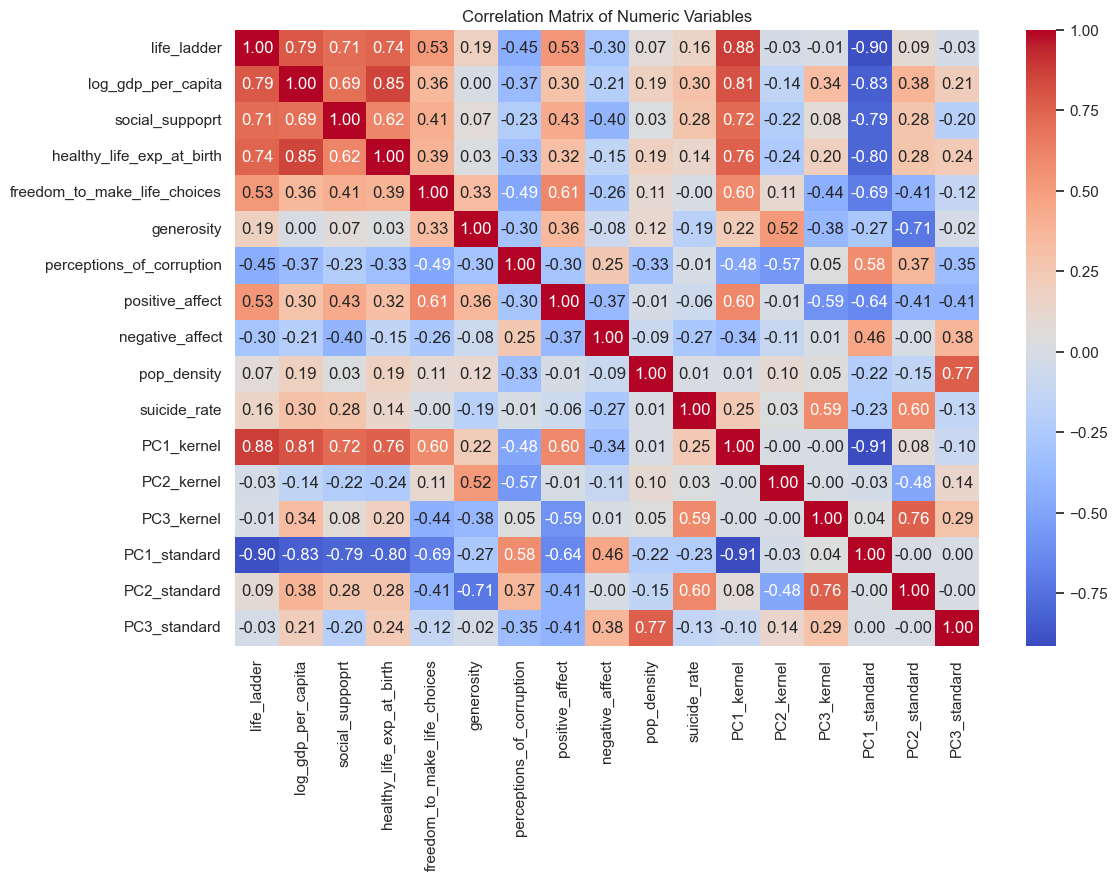

In [441]:
correlations_data_set = pd.concat([kernel_pca_clustered_data.loc[:,'life_ladder':'suicide_rate'], kernel_pca_clustered_data.loc[:,'PC1':'PC3']], axis = 1)
correlations_data_set = correlations_data_set.rename(columns={
    'PC1': 'PC1_kernel',
    'PC2': 'PC2_kernel',
    'PC3': 'PC3_kernel'
})
standard_kernel = pca_transformed_data.rename(columns={
    'PC1': 'PC1_standard',
    'PC2': 'PC2_standard',
    'PC3': 'PC3_standard'
})

correlations_data_set = pd.concat([correlations_data_set, standard_kernel], axis = 1)

#Calculate the correlation matrix
correlation_matrix = correlations_data_set.corr()

#Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


- Check for correlations of kernelized principal components 
- not use categorial region -> but maybe coordinates
- 



### Insights

**Standard PCA:**

- When using the entire dataset, the first three Principal Components (PCs) explain 59% of the variance. 
- Elbow plot analysis:
    - High WCSS values, approximately 5500 for n=4 and 4500 for n=5.
    - Identifying the Elbow point is challenging due to the lack of a clear inflection point.
- Removing categorical variables allows the first three PCs to explain 66% of the variance.
- Elbow plot analysis:
    - Difficulty in determining the optimal number of clusters from the Elbow plot.
    - WCSS values are slightly lower than the previous case, about 5000 for n=4 and 4000 for n=5.
- Advantages of Standard PCA:
    - It is possible to calculate the percentage of variance in the data that is explained by the PCs.

**Kernel PCA:**

- It's not possible to calculate the explained variance in Kernel PCA.
- However, a more discernible Elbow point is observed, and the WCSS (Within Cluster Sum of Squares) is significantly lower.
- For n=4, WCSS is around 135, and for n=5, WCSS is approximately 115. The WCSS is even lower when all attributes are included!

---

### How to Proceed

Given the insights from both Standard and Kernel PCA, the next steps involve:
1. Deciding which PCA method to use based on the data's structure and the project's goals.
2. Considering additional analyses, such as finer cluster validation methods or further exploration of non-linear patterns, to supplement the PCA findings.

---

### Recommendations: Standard PCA vs. Kernel PCA

**Standard PCA:**
- **Pros**: Enables calculation of explained variance, aiding in interpretability and understanding of data structure.
- **Cons**: May not capture complex, non-linear relationships as effectively as Kernel PCA.

**Kernel PCA:**
- **Pros**: Better for data with non-linear patterns, as indicated by lower WCSS and clearer Elbow points, leading to potentially tighter and more defined clusters.
- **Cons**: Lacks direct computation of explained variance, making it more challenging to interpret in terms of the original variables.

**Recommendation**: 
- Choose Standard PCA if the interpretability of components and the quantifiable explanation of variance are crucial, especially for linearly structured data.
- Opt for Kernel PCA if the focus is on identifying coherent clusters in data with potential non-linear relationships, keeping in mind the trade-off in interpretability.


### Cluster Map

In [226]:
import geopandas as gpd

updated_geodata = gpd.read_file('data/updated_geodata.shp')

updated_geodata.dtypes

country        object
continent      object
region         object
geometry     geometry
dtype: object

In [280]:
cluster_data = pca_clustered_data

In [281]:
def interactive_plot_scatter1(year, x_axis, y_axis, ignore_year):
    
    if ignore_year:
        filtered_data = cluster_data
        print(f"All data points")
    else:
        # Filter the data for the selected year
        filtered_data = cluster_data[cluster_data['year'] == year]
        print(f"{filtered_data.shape[0]} countries for the year {year}")

    filtered_data = filtered_data.sort_values(by=['cluster'])

    #Define a fixed color scheme for clusters
    color_map = {
        '0': '#228B22', 
        '1': '#00BFFF',    
        '2': '#FFD700',  
        '3': '#DC143C',
        '4': '#7851A9'
    }

    #Create the plot
    fig = px.scatter(filtered_data, x=x_axis, y=y_axis, color='cluster', 
                     range_x = [np.min(cluster_data[x_axis]-0.5), np.max(cluster_data[x_axis])+0.5],
                     range_y = [np.min(cluster_data[y_axis]-0.5), np.max(cluster_data[y_axis])+0.5],
                     hover_name='country', color_discrete_map=color_map)

    fig.update_layout(
        plot_bgcolor='white', 
        width=1000,  
        height=700,  
        legend=dict(
            orientation="h", 
            yanchor="bottom",
            y=-0.15,  
            xanchor="center",
            x=0.5
        ),
        xaxis=dict(
            showgrid=True,  # Enable x-axis gridlines
            gridcolor='LightGrey',
            zeroline=True,  # Show the zero line for the y-axis
            zerolinecolor='LightGrey', 
            zerolinewidth=1
        ),
        yaxis=dict(
            showgrid=True,  # Enable y-axis gridlines
            gridcolor='LightGrey',
            zeroline=True,  # Show the zero line for the y-axis
            zerolinecolor='LightGrey',  
            zerolinewidth=1
        )
    )
    
    fig.show()

In [282]:
index_life_ladder = cluster_data.columns.get_loc('life_ladder')
index_country = cluster_data.columns.get_loc('country')
index_PC1 = cluster_data.columns.get_loc('PC1')
index_PC3 = cluster_data.columns.get_loc('PC3')

plotting_variables = cluster_data.columns[index_life_ladder:index_country].tolist() + cluster_data.columns[index_PC1:index_PC3+1].tolist()

In [283]:
#Slider for year selection
year_slider = widgets.IntSlider(value=2019, min=cluster_data['year'].min(), max=cluster_data['year'].max(), step=1, description='Year:')
ignore_year_checkbox = widgets.Checkbox(value=False, description='Ignore Year Filter', disabled=False)

#Dropdown for selecting x and y axis variables
variables = plotting_variables 
x_axis_dropdown = widgets.Dropdown(options=variables, value='PC1', description='X Axis:')
y_axis_dropdown = widgets.Dropdown(options=variables, value='PC2', description='Y Axis:')

#Display the interactive widgets
interact(interactive_plot_scatter1, year=year_slider, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown, ignore_year=ignore_year_checkbox)

interactive(children=(IntSlider(value=2019, description='Year:', max=2020, min=2005), Dropdown(description='X …

<function __main__.interactive_plot_scatter1(year, x_axis, y_axis, ignore_year)>

In [284]:
#Define a function to assign unique colors
def get_unique_colors(n):
    return px.colors.qualitative.Plotly[:n]

In [285]:
def interactive_plot_scatter2(year, x_axis, y_axis, selected_countries):
    
    filtered_data = cluster_data[cluster_data['year'] <= year]
    print(f"{len(filtered_data[filtered_data['year'] == year])} data points from year {year}")

    filtered_data = filtered_data.sort_values(by=['cluster'])
    
    #Define a fixed color scheme for clusters
    color_map = {
        '0': '#228B22', 
        '1': '#00BFFF',    
        '2': '#FFD700',  
        '3': '#DC143C',
        '4': '#7851A9'
    }

    #Assign unique colors for each selected country
    unique_colors = get_unique_colors(len(selected_countries))

    # Create the main scatter plot
    fig = px.scatter(filtered_data[filtered_data['year'] == year], 
                 x=x_axis, y=y_axis, color='cluster', 
                 range_x = [np.min(cluster_data[x_axis])-0.5, np.max(cluster_data[x_axis])+0.5],
                 range_y = [np.min(cluster_data[y_axis])-0.5, np.max(cluster_data[y_axis])+0.5],
                 hover_name='country',  # Set hover name to 'country'
                 hover_data={'country': False, x_axis: False, y_axis: False},  # Include only country in hover data
                 opacity=0.4 if selected_countries else 1,  # Adjust opacity
                 color_discrete_map=color_map)

    fig.update_traces(hovertemplate='%{hovertext}')

    #Add lines and points for selected countries
    for i, country in enumerate(selected_countries):
        country_data = filtered_data[filtered_data['country'] == country]
        country_color = unique_colors[i % len(unique_colors)]
        
        #Add line trace for each country
        line_trace = px.line(country_data, x=x_axis, y=y_axis, 
                             color_discrete_sequence=[country_color],
                             hover_name='country', hover_data=['year']).data[0]
        line_trace.name = country  # Assign country name to the line trace for the legend
        line_trace.hovertemplate = f"{country}<br>%{{y}}<extra></extra>"  # Custom hover template
        
        fig.add_trace(line_trace)
    
        #Add scatter trace for points on the line
        point_trace = px.scatter(country_data, x=x_axis, y=y_axis, 
                                 color_discrete_sequence=[country_color], 
                                 hover_name='year', hover_data=['country']).data[0]
        point_trace.hovertemplate = f"%{{hovertext}}<extra>{country}</extra>"  # Custom hover template
    
        fig.add_trace(point_trace)


    #Update layout of the plot
    fig.update_layout(
        plot_bgcolor='white', 
        width=1000,  
        height=700,  
        legend=dict(
            orientation="h", 
            yanchor="bottom",
            y=-0.15,  
            xanchor="center",
            x=0.5
        ),
        xaxis=dict(
            showgrid=True,
            gridcolor='LightGrey',
            zeroline=True,
            zerolinecolor='LightGrey',
            zerolinewidth=1
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='LightGrey',
            zeroline=True,
            zerolinecolor='LightGrey',
            zerolinewidth=1
        )
    )
    
    fig.show()

#Widgets for user interaction
year_slider = widgets.IntSlider(value=2019, min=cluster_data['year'].min(), max=cluster_data['year'].max(), step=1, description='Year:')
country_selection = widgets.SelectMultiple(options=cluster_data['country'].unique(), value=[], description='Countries', disabled=False)

#Dropdown for selecting x and y axis variables
variables = plotting_variables
x_axis_dropdown = widgets.Dropdown(options=variables, value='PC1', description='X Axis:')
y_axis_dropdown = widgets.Dropdown(options=variables, value='PC2', description='Y Axis:')

#Display the interactive widgets
interact(interactive_plot_scatter2, year=year_slider, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown, selected_countries=country_selection)

interactive(children=(IntSlider(value=2019, description='Year:', max=2020, min=2005), Dropdown(description='X …

<function __main__.interactive_plot_scatter2(year, x_axis, y_axis, selected_countries)>

In [286]:
cluster_data_lineplot = cluster_data.copy()

cluster_data_lineplot['cluster'] = cluster_data_lineplot['cluster'].astype(int)

In [287]:
def interactive_plot_line(selected_countries):
    #Define the default x-axis range
    x_range = [np.min(cluster_data_lineplot['year'])-0.5, np.max(cluster_data_lineplot['year'])]

    #Define default range for y-axis
    y_range = [-0.25, 4.25]
    if selected_countries:
        filtered_data = cluster_data_lineplot[cluster_data_lineplot['country'].isin(selected_countries)]
        y_range = [-0.25, 4.25]


    fig = px.line()

    if selected_countries:
        
        unique_colors = get_unique_colors(len(selected_countries))

        #Add lines for each selected country
        for i, country in enumerate(selected_countries):
            country_data = filtered_data[filtered_data['country'] == country]
            country_color = unique_colors[i % len(unique_colors)]

            #Add line trace for each country
            fig.add_trace(px.line(country_data, x="year", y="cluster",
                                  color_discrete_sequence=[country_color],
                                  hover_name="country").data[0])

            #Manually add legend entries
            fig.data[-1].name = country  #Set the name of the last trace added
            fig.data[-1].showlegend = True  #Ensure that the legend is shown for this trace

    # Update layout of the plot
    fig.update_layout(
        plot_bgcolor='white', 
        width=1000,  
        height=700,
        showlegend=True,  
        legend=dict(
            title="Country",  
            orientation="h", 
            yanchor="bottom",
            y=-0.15, 
            xanchor="center",
            x=0.5
        ),
        title={
            'text': "Cluster Changes Over Years by Country",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        yaxis=dict(
            tickvals=[0, 1, 2, 3, 4],  #Set tick values for y-axis
            range=y_range,  #Set range for y-axis
            showgrid=True,
            gridcolor='LightGrey',
            zeroline=True,
            zerolinecolor='LightGrey',
            zerolinewidth=1
        ),
        xaxis=dict(
            range=x_range  # Set range for x-axis
        )
    )
    
    fig.show()

country_selection = widgets.SelectMultiple(options=cluster_data_lineplot['country'].unique(), 
                                           value=[], 
                                           description='Countries', 
                                           disabled=False)

interact(interactive_plot_line, selected_countries=country_selection)

interactive(children=(SelectMultiple(description='Countries', options=('Afghanistan', 'Albania', 'Algeria', 'A…

<function __main__.interactive_plot_line(selected_countries)>